In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
def threshold_sys(sig, th):
    out = np.zeros(len(sig))
    for i in range(len(sig)):
        if(sig[i] > th):
             out[i] = sig[i] - th
    return out

In [18]:
def find_ki(sd, ens, fs, OUT, f_val):
    
    ki_r = []
    ki_i = []
    frq = []
    for i in range(len(sd)):
        ki_r_ens = 0
        ki_i_ens = 0
        for e in range(ens):
            freq, psd = sc.signal.periodogram(OUT[i][e], fs)
            # for finding img part of ki
            ki_img = []
            for j,f in enumerate(freq):
                ki_img.append(2*np.pi*f*psd[j]/sd[i]**2)
            
            # for finding real part of ki
            intgr = np.zeros_like(freq)
            for k in range(len(freq)):
                if abs(freq[k] - f_val) < 1: #idk about the accuracy
                    intgr[k] = 0 # Skip to avoid singularity
                    idx = k # finding the indx
                else:
                    intgr[k] = freq[k] * ki_img[k] / (freq[k]**2 - f_val**2)
            ki_real = 2/np.pi * np.trapz(intgr, 2*np.pi*freq)
            ki_r_ens += ki_img[idx]
            ki_i_ens += ki_real
        frq.append(freq[idx])
        ki_r.append(ki_r_ens/ens)
        ki_i.append(ki_i_ens/ens)
        print(f"{sd[i]} done")

    return frq, ki_i, ki_r

In [4]:
fs = 1e5 # sampling frequency
tp = 5 #time duration
t = np.linspace(0, tp, int(tp*fs)) #time series
V_th = 2 #threshold
ens = 100

sd = np.arange(0.6, 4, 0.1)

In [5]:
OUT = []
# IN = []

for i in range(len(sd)):
    OUT_ens = []
    # IN_ens = []
    for e in range(ens):
        #noise
        noise = np.random.normal(0, sd[i], len(t))
        # IN_ens.append(sig_in)
        #output
        sig_out = threshold_sys(noise, V_th)
        OUT_ens.append(sig_out)
    # IN.append(IN_ens)
    OUT.append(OUT_ens)
    print(f"sd = {sd[i]} done")

sd = 0.6 done
sd = 0.7 done
sd = 0.7999999999999999 done
sd = 0.8999999999999999 done
sd = 0.9999999999999999 done
sd = 1.0999999999999999 done
sd = 1.1999999999999997 done
sd = 1.2999999999999998 done
sd = 1.4 done
sd = 1.4999999999999998 done
sd = 1.5999999999999996 done
sd = 1.6999999999999997 done
sd = 1.7999999999999998 done
sd = 1.9 done
sd = 1.9999999999999996 done
sd = 2.0999999999999996 done
sd = 2.1999999999999997 done
sd = 2.3 done
sd = 2.3999999999999995 done
sd = 2.4999999999999996 done
sd = 2.5999999999999996 done
sd = 2.6999999999999997 done
sd = 2.7999999999999994 done
sd = 2.8999999999999995 done
sd = 2.9999999999999996 done
sd = 3.0999999999999996 done
sd = 3.1999999999999997 done
sd = 3.2999999999999994 done
sd = 3.3999999999999995 done
sd = 3.4999999999999996 done
sd = 3.599999999999999 done
sd = 3.6999999999999993 done
sd = 3.7999999999999994 done
sd = 3.8999999999999995 done


In [19]:
frq, ki_i, ki_r = find_ki(sd, ens, fs, OUT, 100)

0.6 done
0.7 done
0.7999999999999999 done
0.8999999999999999 done
0.9999999999999999 done
1.0999999999999999 done
1.1999999999999997 done
1.2999999999999998 done
1.4 done
1.4999999999999998 done
1.5999999999999996 done
1.6999999999999997 done
1.7999999999999998 done
1.9 done
1.9999999999999996 done
2.0999999999999996 done
2.1999999999999997 done
2.3 done
2.3999999999999995 done
2.4999999999999996 done
2.5999999999999996 done
2.6999999999999997 done
2.7999999999999994 done
2.8999999999999995 done
2.9999999999999996 done
3.0999999999999996 done
3.1999999999999997 done
3.2999999999999994 done
3.3999999999999995 done
3.4999999999999996 done
3.599999999999999 done
3.6999999999999993 done
3.7999999999999994 done
3.8999999999999995 done


In [24]:
# Load the .npz file
data = np.load("SR_clipper_data2.npz")

# Access the arrays by key
sd_01 = data['arr_0']
PSR_01 = data['arr_8']
SNR_01 = data['arr_9']
COV_01 = data['arr_10']


In [29]:
mod_ki = np.sqrt(np.array(ki_i)**2 + np.array(ki_r)**2)
nf = PSR_01/SNR_01
Snr_anl = mod_ki/nf

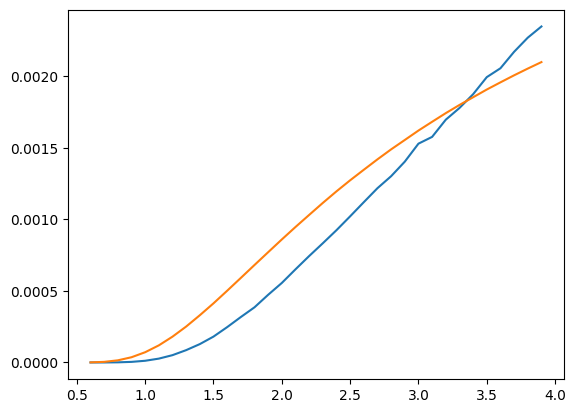

In [41]:
plt.plot(sd_01, PSR_01)
plt.plot(sd_01, mod_ki/2000)